In [1]:
# Import Libraries

In [2]:
import pandas as pd
import numpy as np
import statsmodels as sm
import pylab as pl
from scipy import stats
from io import StringIO
from sklearn import preprocessing
from sklearn import cluster, tree, decomposition
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt
import pydot
import seaborn as sns

In [3]:
# Downloading the dataset
file_name = "https://raw.githubusercontent.com/itsahmedmohamedamin/Customer-Clustering-for-Travel-Agency-Customers/main/travel.csv"
travel = pd.read_csv(file_name)

In [4]:
travel.head()

,Unnamed: 0,date_time,site_name,posa_continent,user_location_country,user_location_region,user_location_city,orig_destination_distance,user_id,is_mobile,...,srch_children_cnt,srch_rm_cnt,srch_destination_id,srch_destination_type_id,is_booking,cnt,hotel_continent,hotel_country,hotel_market,hotel_cluster
0,24636210,2014-11-03 16:02:28,24,2,77,871,36643,456.1151,792280,0,...,0,1,8286,1,0,1,0,63,1258,68
1,19837144,2013-03-13 19:25:01,11,3,205,135,38749,232.4737,961995,0,...,0,1,1842,3,0,1,2,198,786,37
2,13066459,2014-10-13 13:20:25,2,3,66,314,48562,4468.2720,495669,0,...,0,1,8746,1,0,1,6,105,29,22
3,4691082,2013-11-05 10:40:34,11,3,205,411,52752,171.6021,106611,0,...,0,1,6210,3,1,1,2,198,1234,42
4,4878884,2014-06-10 13:34:56,2,3,66,174,50644,NaN,596177,0,...,1,1,12812,5,0,1,2,50,368,83


In [5]:
travel.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 25 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   Unnamed: 0                 100000 non-null  int64  
 1   date_time                  100000 non-null  object 
 2   site_name                  100000 non-null  int64  
 3   posa_continent             100000 non-null  int64  
 4   user_location_country      100000 non-null  int64  
 5   user_location_region       100000 non-null  int64  
 6   user_location_city         100000 non-null  int64  
 7   orig_destination_distance  63915 non-null   float64
 8   user_id                    100000 non-null  int64  
 9   is_mobile                  100000 non-null  int64  
 10  is_package                 100000 non-null  int64  
 11  channel                    100000 non-null  int64  
 12  srch_ci                    99878 non-null   object 
 13  srch_co                    998

In [6]:
print ("Rows     : " , travel.shape[0])
print ("Columns  : " , travel.shape[1])
print ("\nFeatures : \n" ,travel.columns.tolist())
print ("\nMissing values :  ", travel.isnull().sum().values.sum())
print ("\nUnique values :  \n", travel.nunique())

Rows     :  100000
Columns  :  25

Features : 
 ['Unnamed: 0', 'date_time', 'site_name', 'posa_continent', 'user_location_country', 'user_location_region', 'user_location_city', 'orig_destination_distance', 'user_id', 'is_mobile', 'is_package', 'channel', 'srch_ci', 'srch_co', 'srch_adults_cnt', 'srch_children_cnt', 'srch_rm_cnt', 'srch_destination_id', 'srch_destination_type_id', 'is_booking', 'cnt', 'hotel_continent', 'hotel_country', 'hotel_market', 'hotel_cluster']

Missing values :   36329

Unique values :  
 Unnamed: 0                   100000
date_time                     99886
site_name                        41
posa_continent                    5
user_location_country           201
user_location_region            779
user_location_city            10779
orig_destination_distance     62206
user_id                       88863
is_mobile                         2
is_package                        2
channel                          11
srch_ci                        1066
srch_co     

In [7]:
travel.describe()

,Unnamed: 0,site_name,posa_continent,user_location_country,user_location_region,user_location_city,orig_destination_distance,user_id,is_mobile,is_package,...,srch_children_cnt,srch_rm_cnt,srch_destination_id,srch_destination_type_id,is_booking,cnt,hotel_continent,hotel_country,hotel_market,hotel_cluster
count,1.000000e+05,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,63915.000000,1.000000e+05,100000.000000,100000.000000,...,100000.000000,100000.000000,100000.00000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,1.882530e+07,9.838570,2.678150,85.995070,308.636990,27676.391240,1960.661721,6.054383e+05,0.133770,0.248140,...,0.336750,1.111750,14426.32738,2.577290,0.079930,1.487980,3.150920,81.093290,598.848330,49.860370
std,1.086183e+07,11.996426,0.749018,59.292002,208.706581,16768.647409,2228.153377,3.516154e+05,0.340407,0.431936,...,0.734449,0.451602,11036.98122,2.149263,0.271186,1.280262,1.620534,56.111519,510.959297,28.885423
min,1.012000e+03,2.000000,0.000000,0.000000,0.000000,0.000000,0.005600,1.400000e+01,0.000000,0.000000,...,0.000000,0.000000,4.00000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,9.448967e+06,2.000000,3.000000,66.000000,174.000000,12949.000000,312.792100,2.987962e+05,0.000000,0.000000,...,0.000000,1.000000,8267.00000,1.000000,0.000000,1.000000,2.000000,50.000000,158.000000,25.000000
50%,1.881212e+07,2.000000,3.000000,66.000000,314.000000,27655.000000,1131.835300,6.028825e+05,0.000000,0.000000,...,0.000000,1.000000,9145.00000,1.000000,0.000000,1.000000,2.000000,50.000000,591.000000,49.000000
75%,2.825307e+07,15.000000,3.000000,70.000000,385.000000,42328.000000,2542.359350,9.157222e+05,0.000000,0.000000,...,0.000000,1.000000,18784.00000,5.000000,0.000000,2.000000,4.000000,106.000000,701.000000,73.000000
max,3.767009e+07,53.000000,4.000000,239.000000,1025.000000,56507.000000,11965.376100,1.198783e+06,1.000000,1.000000,...,9.000000,8.000000,65035.00000,9.000000,1.000000,120.000000,6.000000,212.000000,2117.000000,99.000000


In [8]:
travel.isnull().sum()

Unnamed: 0                       0
date_time                        0
site_name                        0
posa_continent                   0
user_location_country            0
user_location_region             0
user_location_city               0
orig_destination_distance    36085
user_id                          0
is_mobile                        0
is_package                       0
channel                          0
srch_ci                        122
srch_co                        122
srch_adults_cnt                  0
srch_children_cnt                0
srch_rm_cnt                      0
srch_destination_id              0
srch_destination_type_id         0
is_booking                       0
cnt                              0
hotel_continent                  0
hotel_country                    0
hotel_market                     0
hotel_cluster                    0
dtype: int64

In [9]:
# Creating and preprocessing the data

In [10]:
corr = travel.corr()
corr

<ipython-input-10-da297e0c1100>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = travel.corr()


,Unnamed: 0,site_name,posa_continent,user_location_country,user_location_region,user_location_city,orig_destination_distance,user_id,is_mobile,is_package,...,srch_children_cnt,srch_rm_cnt,srch_destination_id,srch_destination_type_id,is_booking,cnt,hotel_continent,hotel_country,hotel_market,hotel_cluster
Unnamed: 0,1.000000,0.005119,-0.000626,0.001028,0.000501,-0.002442,-0.003072,0.010300,-0.006413,-0.000838,...,0.000239,-0.004142,0.001031,-0.003505,-0.002716,-0.004491,0.006402,0.003373,0.004371,-0.005887
site_name,0.005119,1.000000,-0.637743,0.159283,0.130818,-0.013471,0.027609,0.030404,-0.005418,0.048820,...,-0.031962,0.016585,0.034895,-0.006934,-0.013460,0.022274,0.201760,0.263167,-0.068316,-0.026689
posa_continent,-0.000626,-0.637743,1.000000,0.179726,-0.034647,0.039227,0.049808,-0.015209,0.016331,-0.093459,...,0.034453,-0.033712,-0.015535,0.037172,0.013319,-0.018952,-0.333578,-0.156578,0.049214,0.018297
user_location_country,0.001028,0.159283,0.179726,1.000000,0.058496,0.122686,0.047689,-0.021091,0.003728,-0.025284,...,0.037101,0.000858,0.013486,0.028888,0.001284,0.003539,-0.063744,0.097624,0.015569,-0.011876
user_location_region,0.000501,0.130818,-0.034647,0.058496,1.000000,0.132457,0.136560,0.002225,0.016982,0.040482,...,0.014009,0.000254,0.022567,0.001376,0.000253,-0.007570,0.043027,-0.050301,0.040367,0.004984
user_location_city,-0.002442,-0.013471,0.039227,0.122686,0.132457,1.000000,0.014178,-0.007989,-0.003741,0.013032,...,0.002638,-0.000694,0.000786,-0.004399,-0.002655,-0.002175,0.007759,-0.001987,0.008558,0.000102
orig_destination_distance,-0.003072,0.027609,0.049808,0.047689,0.136560,0.014178,1.000000,0.017015,-0.059464,0.041991,...,-0.059722,-0.012484,-0.036314,-0.042859,-0.033480,0.009483,0.416180,0.254321,-0.090112,0.003624
user_id,0.010300,0.030404,-0.015209,-0.021091,0.002225,-0.007989,0.017015,1.000000,-0.011439,-0.018901,...,0.002983,-0.001625,0.002716,0.007133,0.001561,0.001355,0.002447,0.008707,-0.002463,0.003202
is_mobile,-0.006413,-0.005418,0.016331,0.003728,0.016982,-0.003741,-0.059464,-0.011439,1.000000,0.046903,...,0.018211,-0.022565,-0.007140,-0.016039,-0.028623,0.008084,-0.024144,-0.029574,0.007644,0.012145
is_package,-0.000838,0.048820,-0.093459,-0.025284,0.040482,0.013032,0.041991,-0.018901,0.046903,1.000000,...,-0.037673,-0.036653,-0.146647,-0.224422,-0.081307,0.126500,0.108993,-0.044426,-0.014636,0.031399


In [11]:
# distribution of number of booking attempts per user
booking_count_per_user = travel.groupby('user_id')['is_booking'].agg(['count']).reset_index()
booking_count_per_user.head(25)

,user_id,count
0,14,1
1,38,1
2,40,1
3,156,2
4,160,1
5,184,1
6,192,1
7,194,1
8,206,1
9,209,2


In [12]:
# Consilidate by user IDs
# Merge this with original dataframe to add our 'count' column
travel.groupby('user_id')['is_booking'].agg(['count']).head()
travel = travel.merge(travel.groupby('user_id')['is_booking'].agg(['count']).reset_index())
travel.head()

,Unnamed: 0,date_time,site_name,posa_continent,user_location_country,user_location_region,user_location_city,orig_destination_distance,user_id,is_mobile,...,srch_rm_cnt,srch_destination_id,srch_destination_type_id,is_booking,cnt,hotel_continent,hotel_country,hotel_market,hotel_cluster,count
0,24636210,2014-11-03 16:02:28,24,2,77,871,36643,456.1151,792280,0,...,1,8286,1,0,1,0,63,1258,68,2
1,24636169,2014-07-28 23:50:54,24,2,77,871,36643,454.4611,792280,0,...,1,8286,1,0,1,0,63,1258,14,2
2,19837144,2013-03-13 19:25:01,11,3,205,135,38749,232.4737,961995,0,...,1,1842,3,0,1,2,198,786,37,1
3,13066459,2014-10-13 13:20:25,2,3,66,314,48562,4468.2720,495669,0,...,1,8746,1,0,1,6,105,29,22,1
4,4691082,2013-11-05 10:40:34,11,3,205,411,52752,171.6021,106611,0,...,1,6210,3,1,1,2,198,1234,42,2


In [13]:
# Changing the column type to  datatime type using pandas
travel['srch_co'] = pd.to_datetime(travel['srch_co'])
travel['srch_ci'] = pd.to_datetime(travel['srch_ci'])
travel['date_time'] = pd.to_datetime(travel['date_time'])
# Change the timestamp of 'date_time' (2014-11-03 16:02:28) to simply "2014-11-03"
travel['date'] = pd.to_datetime(travel['date_time'].apply(lambda x: x.date()))

In [14]:
travel.head()

,Unnamed: 0,date_time,site_name,posa_continent,user_location_country,user_location_region,user_location_city,orig_destination_distance,user_id,is_mobile,...,srch_destination_id,srch_destination_type_id,is_booking,cnt,hotel_continent,hotel_country,hotel_market,hotel_cluster,count,date
0,24636210,2014-11-03 16:02:28,24,2,77,871,36643,456.1151,792280,0,...,8286,1,0,1,0,63,1258,68,2,2014-11-03
1,24636169,2014-07-28 23:50:54,24,2,77,871,36643,454.4611,792280,0,...,8286,1,0,1,0,63,1258,14,2,2014-07-28
2,19837144,2013-03-13 19:25:01,11,3,205,135,38749,232.4737,961995,0,...,1842,3,0,1,2,198,786,37,1,2013-03-13
3,13066459,2014-10-13 13:20:25,2,3,66,314,48562,4468.2720,495669,0,...,8746,1,0,1,6,105,29,22,1,2014-10-13
4,4691082,2013-11-05 10:40:34,11,3,205,411,52752,171.6021,106611,0,...,6210,3,1,1,2,198,1234,42,2,2013-11-05


In [15]:
# Logic Checks

In [16]:
# Group Counts
pd.crosstab(travel['srch_adults_cnt'], travel['srch_children_cnt'])

srch_children_cnt,0,1,2,3,4,5,6,7,8,9
srch_adults_cnt,,,,,,,,,,
0,174,2,3,2,0,0,0,0,0,0
1,18749,2137,523,117,11,1,9,1,2,0
2,50736,7093,6529,972,208,14,7,1,0,0
3,3645,1131,469,131,27,5,2,2,0,2
4,3933,690,494,77,83,9,4,0,0,0
5,535,131,41,20,6,4,2,0,0,0
6,669,73,53,28,18,13,7,0,0,0
7,99,20,5,8,6,3,0,0,0,0
8,183,12,13,2,6,1,3,2,2,1


In [17]:
# Add the counts of travellers and drop the rows that area equal to zero
travel.drop(travel[travel['srch_adults_cnt'] + travel['srch_children_cnt']==0].index).head()

,Unnamed: 0,date_time,site_name,posa_continent,user_location_country,user_location_region,user_location_city,orig_destination_distance,user_id,is_mobile,...,srch_destination_id,srch_destination_type_id,is_booking,cnt,hotel_continent,hotel_country,hotel_market,hotel_cluster,count,date
0,24636210,2014-11-03 16:02:28,24,2,77,871,36643,456.1151,792280,0,...,8286,1,0,1,0,63,1258,68,2,2014-11-03
1,24636169,2014-07-28 23:50:54,24,2,77,871,36643,454.4611,792280,0,...,8286,1,0,1,0,63,1258,14,2,2014-07-28
2,19837144,2013-03-13 19:25:01,11,3,205,135,38749,232.4737,961995,0,...,1842,3,0,1,2,198,786,37,1,2013-03-13
3,13066459,2014-10-13 13:20:25,2,3,66,314,48562,4468.2720,495669,0,...,8746,1,0,1,6,105,29,22,1,2014-10-13
4,4691082,2013-11-05 10:40:34,11,3,205,411,52752,171.6021,106611,0,...,6210,3,1,1,2,198,1234,42,2,2013-11-05


In [18]:
# Feature Engineering

In [19]:
def duration(row):
  delta = (row['srch_co'] - row['srch_ci'])/np.timedelta64(1, 'D')
  if delta <= 0:
    return np.nan
  else:
    return delta
def days_in_advance(row):
  delta = (row['srch_ci'] - row['date'])/np.timedelta64(1, 'D')
  if delta <= 0:
    return np.nan
  else:
    return delta

In [20]:
travel['duration'] = travel.apply(duration, axis=1)

In [21]:
travel['days_in_advance'] = travel.apply(days_in_advance, axis=1)

In [22]:
travel.head()

,Unnamed: 0,date_time,site_name,posa_continent,user_location_country,user_location_region,user_location_city,orig_destination_distance,user_id,is_mobile,...,is_booking,cnt,hotel_continent,hotel_country,hotel_market,hotel_cluster,count,date,duration,days_in_advance
0,24636210,2014-11-03 16:02:28,24,2,77,871,36643,456.1151,792280,0,...,0,1,0,63,1258,68,2,2014-11-03,4.0,42.0
1,24636169,2014-07-28 23:50:54,24,2,77,871,36643,454.4611,792280,0,...,0,1,0,63,1258,14,2,2014-07-28,5.0,29.0
2,19837144,2013-03-13 19:25:01,11,3,205,135,38749,232.4737,961995,0,...,0,1,2,198,786,37,1,2013-03-13,1.0,NaN
3,13066459,2014-10-13 13:20:25,2,3,66,314,48562,4468.2720,495669,0,...,0,1,6,105,29,22,1,2014-10-13,7.0,172.0
4,4691082,2013-11-05 10:40:34,11,3,205,411,52752,171.6021,106611,0,...,1,1,2,198,1234,42,2,2013-11-05,1.0,2.0


In [23]:
agg_travel = travel.groupby('channel')['is_booking'].agg(booking_rate='mean', num_of_bookings='count').reset_index().sort_values(by='channel')
print(agg_travel)


    channel  booking_rate  num_of_bookings
0         0      0.071948            12523
1         1      0.069690            10274
2         2      0.060490             7836
3         3      0.060400             4404
4         4      0.120784             2194
5         5      0.094349             6158
6         6      0.067901              162
7         7      0.043157              811
8         8      0.055351              271
9         9      0.085381            55352
10       10      0.200000               15


In [53]:
travel = travel.dropna()

In [54]:
travel.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 61425 entries, 0 to 99999
Data columns (total 29 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   Unnamed: 0                 61425 non-null  int64         
 1   date_time                  61425 non-null  datetime64[ns]
 2   site_name                  61425 non-null  int64         
 3   posa_continent             61425 non-null  int64         
 4   user_location_country      61425 non-null  int64         
 5   user_location_region       61425 non-null  int64         
 6   user_location_city         61425 non-null  int64         
 7   orig_destination_distance  61425 non-null  float64       
 8   user_id                    61425 non-null  int64         
 9   is_mobile                  61425 non-null  int64         
 10  is_package                 61425 non-null  int64         
 11  channel                    61425 non-null  int64         
 12  srch

In [24]:
# Visualizing the data

Text(0.5, 1.0, 'Heatmap of Correlation Matrix')

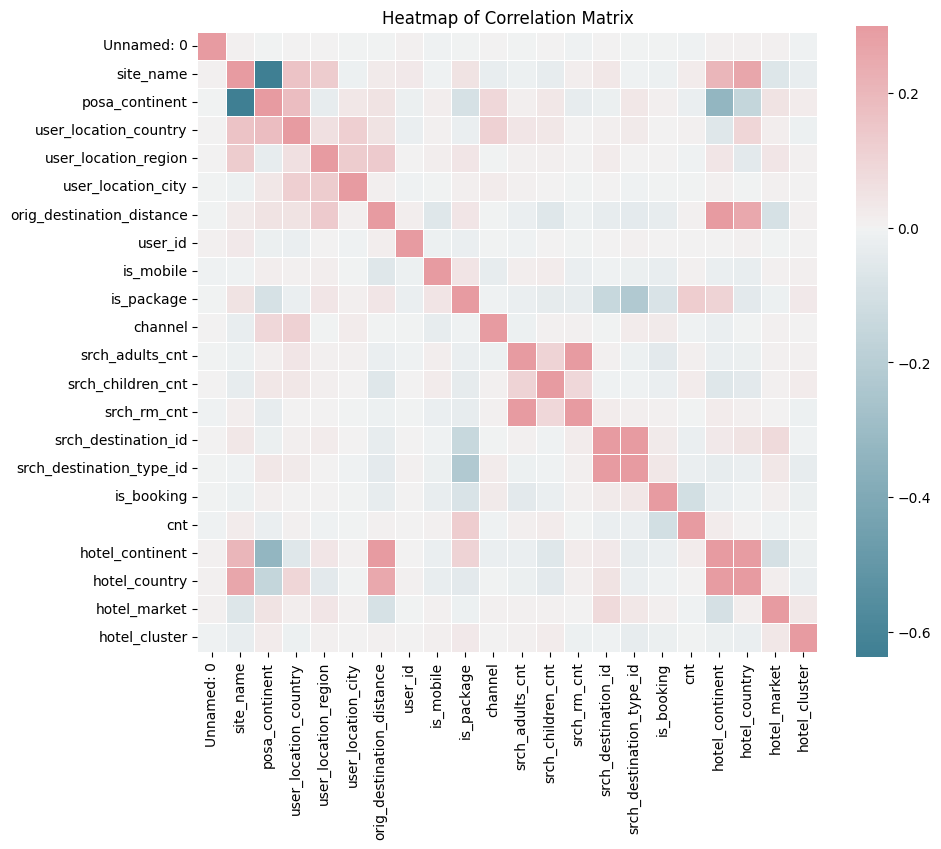

In [25]:
# Generate Corelation plot
plt.figure(figsize=(10,10))
cmap = sns.diverging_palette(220, 10, as_cmap= True)
sns.heatmap(corr,xticklabels=corr.columns.values,yticklabels=corr.columns.values,cmap=cmap,vmax=.3, center=0, square=True, linewidths=.5, cbar_kws={"shrink": .82})
plt.title('Heatmap of Correlation Matrix')

array([[<Axes: title={'center': 'channel'}>,
        <Axes: title={'center': 'is_booking'}>,
        <Axes: title={'center': 'is_mobile'}>],
       [<Axes: title={'center': 'orig_destination_distance'}>,
        <Axes: title={'center': 'srch_rm_cnt'}>,
        <Axes: title={'center': 'srch_adults_cnt'}>],
       [<Axes: title={'center': 'srch_children_cnt'}>, <Axes: >,
        <Axes: >]], dtype=object)

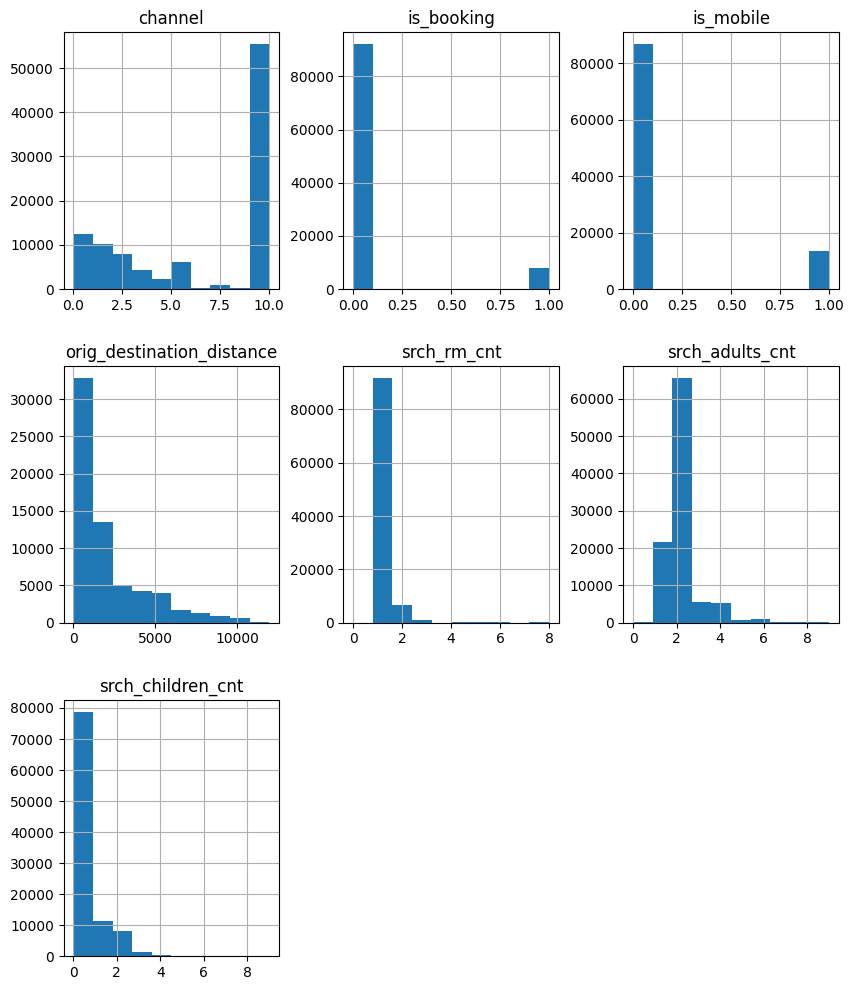

In [26]:
# Plot some of the data
travel[['channel', 'is_booking', 'is_mobile', 'orig_destination_distance', 'srch_rm_cnt', 'srch_adults_cnt', 'srch_children_cnt']].hist(figsize=(10,12))

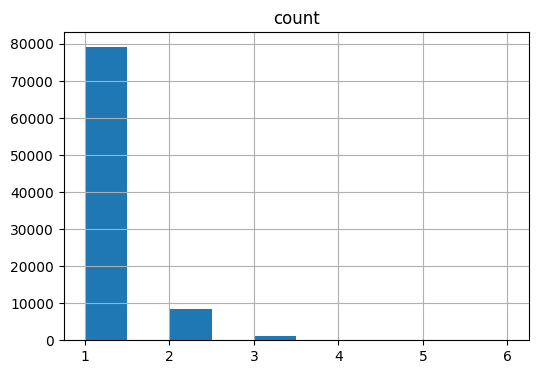

In [27]:
# Visualizing Number of Attempts per user
booking_count_per_user[['count']].hist(figsize=(6,4));

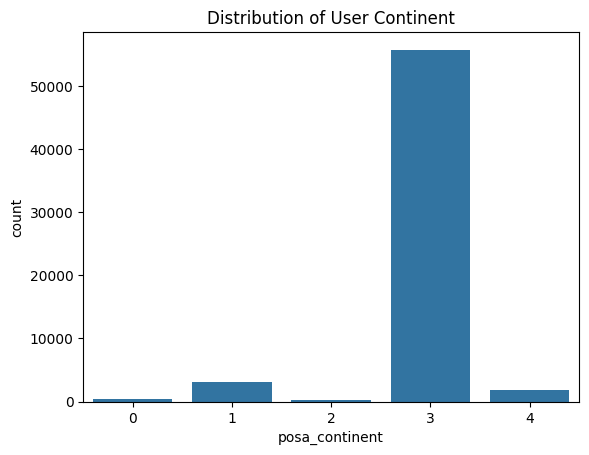

In [57]:
# Distribution of User Continent
sns.countplot(data=travel, x='posa_continent')
plt.title('Distribution of User Continent')
plt.show()

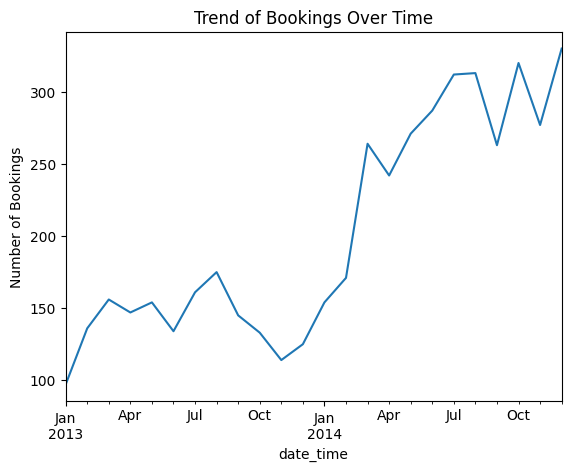

In [58]:
# Trend of Bookings Over Time
travel.set_index('date_time')['is_booking'].resample('M').sum().plot()
plt.title('Trend of Bookings Over Time')
plt.ylabel('Number of Bookings')
plt.show()

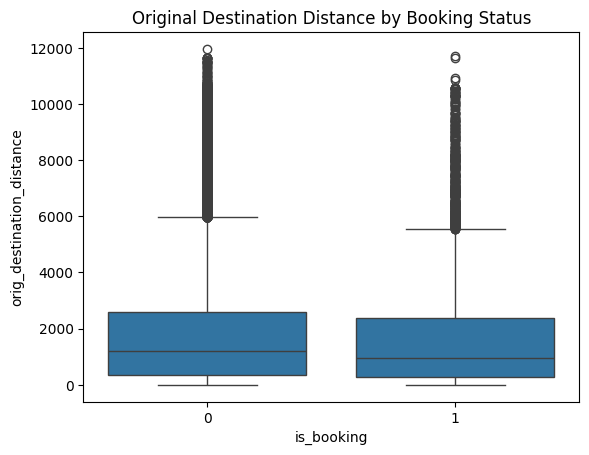

In [59]:
# Boxplot of Original Destination Distance by Booking Status
sns.boxplot(data=travel, x='is_booking', y='orig_destination_distance')
plt.title('Original Destination Distance by Booking Status')
plt.show()

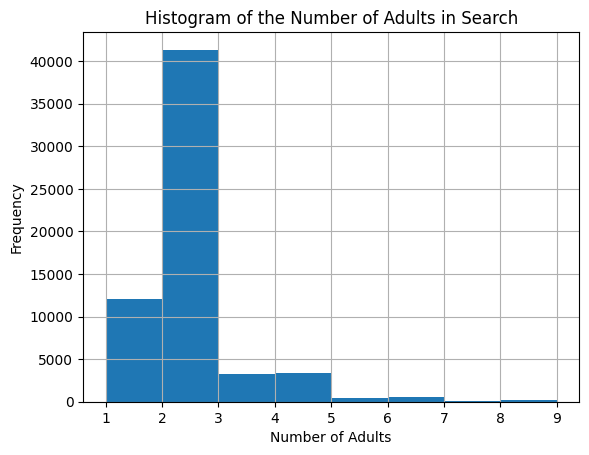

In [60]:
# Histogram of the Number of Adults in Search
travel['srch_adults_cnt'].hist(bins=range(1, travel['srch_adults_cnt'].max()+1))
plt.title('Histogram of the Number of Adults in Search')
plt.xlabel('Number of Adults')
plt.ylabel('Frequency')
plt.show()

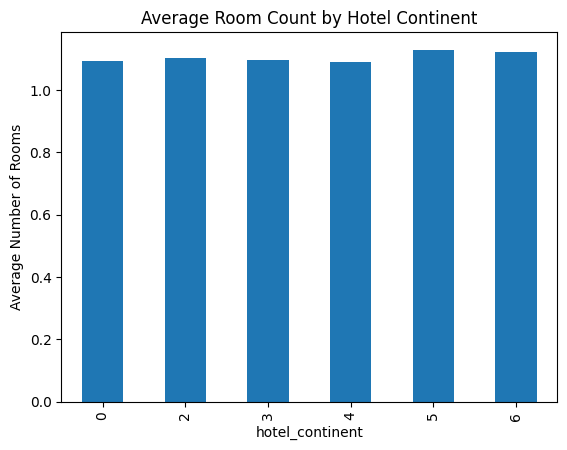

In [61]:
# Average Number of Room Count by Hotel Continent
travel.groupby('hotel_continent')['srch_rm_cnt'].mean().plot(kind='bar')
plt.title('Average Room Count by Hotel Continent')
plt.ylabel('Average Number of Rooms')
plt.show()

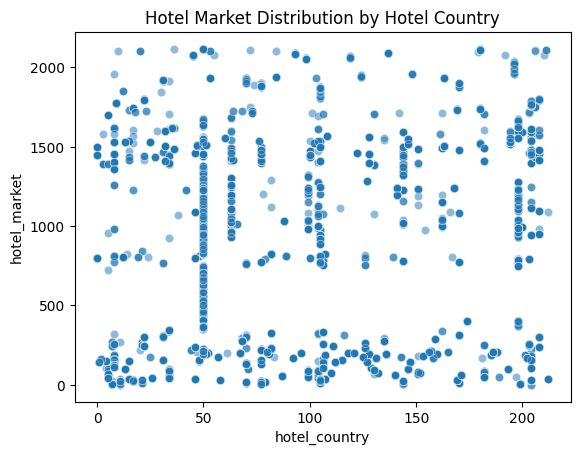

In [62]:
# Hotel Market Distribution by Hotel Country
sns.scatterplot(data=travel, x='hotel_country', y='hotel_market', alpha=0.5)
plt.title('Hotel Market Distribution by Hotel Country')
plt.show()

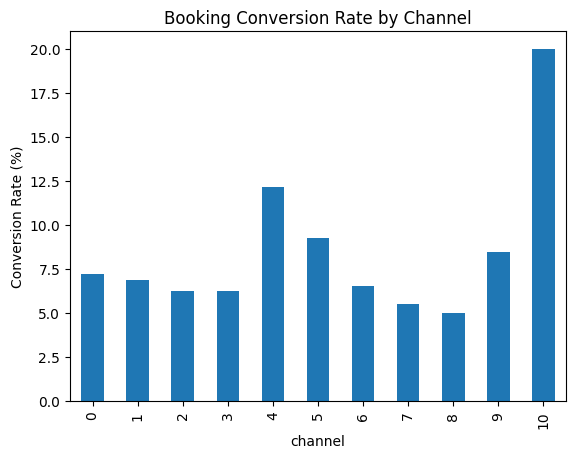

In [64]:
# Booking Conversion Rate by Channel
(travel.groupby('channel')['is_booking'].mean() * 100).plot(kind='bar')
plt.title('Booking Conversion Rate by Channel')
plt.ylabel('Conversion Rate (%)')
plt.show()


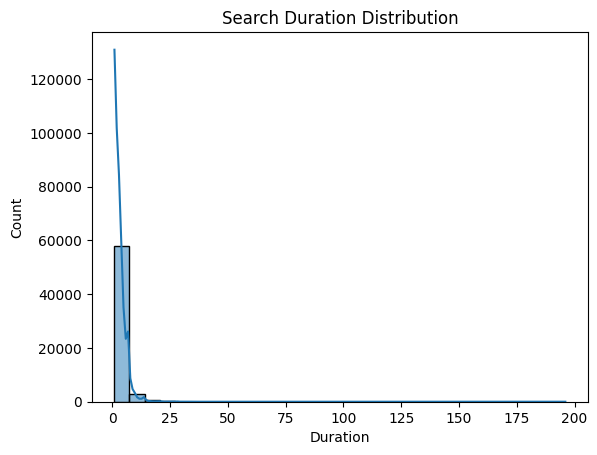

In [65]:
# Search Duration Distribution
sns.histplot(travel['duration'], bins=30, kde=True)
plt.title('Search Duration Distribution')
plt.xlabel('Duration')
plt.show()

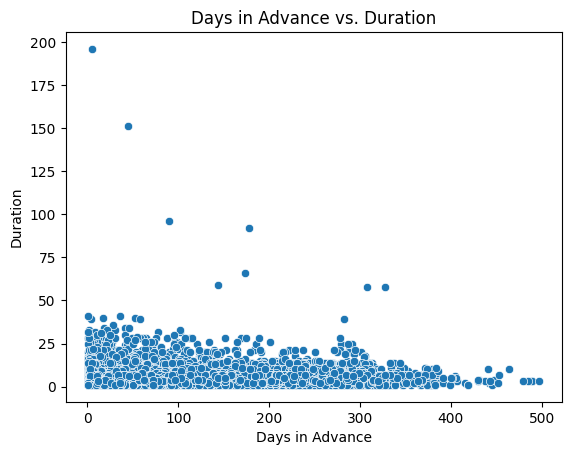

In [72]:
# Days in Advance vs. Duration
sns.scatterplot(data=travel, x='days_in_advance', y='duration')
plt.title('Days in Advance vs. Duration')
plt.xlabel('Days in Advance')
plt.ylabel('Duration')
plt.show()

In [28]:
# Let's Start Clustering

In [29]:
# Choose some selected featues
features_to_explore = ['duration', 'days_in_advance', 'orig_destination_distance', 'is_mobile','is_package', 'srch_adults_cnt', 'srch_children_cnt', 'srch_rm_cnt']

In [30]:
# Create the two new dataframes
city_data = travel.dropna(axis=0)[features_to_explore + ['user_location_city']]
city_groups = city_data.groupby('user_location_city').mean().reset_index().dropna(axis=0)

In [31]:
city_groups.head()

,user_location_city,duration,days_in_advance,orig_destination_distance,is_mobile,is_package,srch_adults_cnt,srch_children_cnt,srch_rm_cnt
0,0,2.0000,78.50,2315.83625,0.0000,0.25,1.7500,0.00,1.0
1,3,4.5625,92.25,3550.01750,0.0625,0.25,1.9375,0.50,1.0
2,7,14.0000,58.00,5994.86400,0.0000,1.00,2.0000,0.00,1.0
3,14,7.0000,35.75,5342.81910,0.0000,0.00,2.0000,0.75,1.0
4,21,5.0000,31.50,2165.76890,0.0000,0.50,1.5000,1.00,1.0


In [32]:
city_groups.shape

(4480, 9)

In [33]:
city_data.head()

,duration,days_in_advance,orig_destination_distance,is_mobile,is_package,srch_adults_cnt,srch_children_cnt,srch_rm_cnt,user_location_city
0,4.0,42.0,456.1151,0,1,2,0,1,36643
1,5.0,29.0,454.4611,0,1,1,0,1,36643
3,7.0,172.0,4468.2720,0,1,2,0,1,48562
4,1.0,2.0,171.6021,0,0,2,0,1,52752
5,3.0,7.0,209.6633,0,0,1,0,1,54864


In [34]:
city_data.shape

(61425, 9)

In [35]:
# Standardizing Data

In [36]:
city_groups_std = city_groups.copy()
cols = ['duration', 'days_in_advance', 'orig_destination_distance',	'is_mobile', 'is_package', 'srch_adults_cnt', 'srch_children_cnt', 'srch_rm_cnt']
city_groups_std[cols] = preprocessing.scale(city_groups_std[cols])
city_groups_std.head()

,user_location_city,duration,days_in_advance,orig_destination_distance,is_mobile,is_package,srch_adults_cnt,srch_children_cnt,srch_rm_cnt
0,0,-0.686327,0.434501,0.294719,-0.584771,-0.027592,-0.501667,-0.682922,-0.32579
1,3,0.540148,0.729729,1.056810,-0.304363,-0.027592,-0.213574,0.239068,-0.32579
2,7,5.057167,-0.005656,2.566471,-0.584771,2.422492,-0.117543,-0.682922,-0.32579
3,14,1.706795,-0.483389,2.163842,-0.584771,-0.844287,-0.117543,0.700063,-0.32579
4,21,0.749546,-0.574641,0.202054,-0.584771,0.789103,-0.885790,1.161059,-0.32579


In [37]:
# Implement clustering via K-Means

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


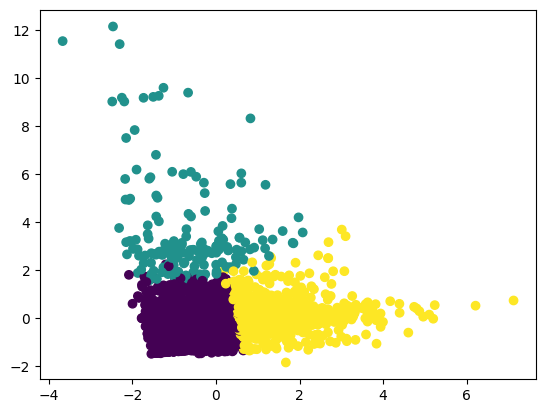

In [38]:
km = cluster.KMeans(n_clusters=3, max_iter=300, random_state=None)
city_groups_std['cluster'] = km.fit_predict(city_groups_std[features_to_explore])
pca = decomposition.PCA(n_components=2, whiten=True)
city_groups_std['x'] = pca.fit_transform(city_groups_std[features_to_explore])[:, 0]
city_groups_std['y'] = pca.fit_transform(city_groups_std[features_to_explore])[:, 1]
plt.scatter(city_groups_std['x'], city_groups_std['y'], c=city_groups_std['cluster'])
plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


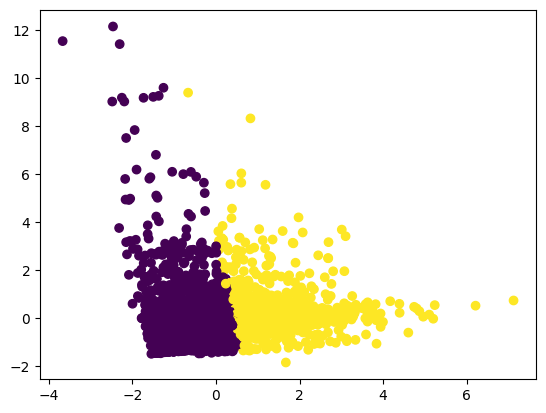

In [39]:
#Let's try it now with 2 clusters

km = cluster.KMeans(n_clusters=2, max_iter=300, random_state=None)
city_groups_std['cluster'] = km.fit_predict(city_groups_std[features_to_explore])

# Principal Component Analysis for Visualization
pca = decomposition.PCA(n_components=2, whiten=True)
city_groups_std['x'] = pca.fit_transform(city_groups_std[features_to_explore])[:, 0]
city_groups_std['y'] = pca.fit_transform(city_groups_std[features_to_explore])[:, 1]
plt.scatter(city_groups_std['x'], city_groups_std['y'], c=city_groups_std['cluster'])
plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


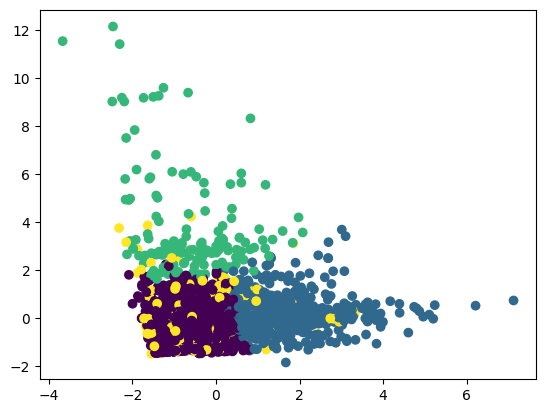

In [40]:
#Let's try it now with 4 clusters

km = cluster.KMeans(n_clusters=4, max_iter=300, random_state=None)
city_groups_std['cluster'] = km.fit_predict(city_groups_std[features_to_explore])

# Principal Component Analysis for Visualization
pca = decomposition.PCA(n_components=2, whiten=True)
city_groups_std['x'] = pca.fit_transform(city_groups_std[features_to_explore])[:, 0]
city_groups_std['y'] = pca.fit_transform(city_groups_std[features_to_explore])[:, 1]
plt.scatter(city_groups_std['x'], city_groups_std['y'], c=city_groups_std['cluster'])
plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


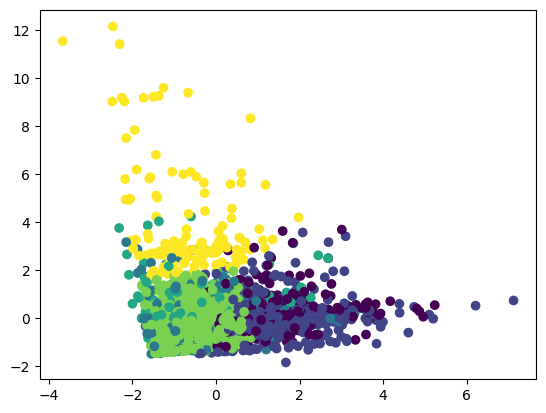

In [41]:
# Now with 6

km = cluster.KMeans(n_clusters=6, max_iter=300, random_state=None)
city_groups_std['cluster'] = km.fit_predict(city_groups_std[features_to_explore])

# Principal Component Analysis for Visualization
pca = decomposition.PCA(n_components=2, whiten=True)

city_groups_std['x'] = pca.fit_transform(city_groups_std[features_to_explore])[:, 0]
city_groups_std['y'] = pca.fit_transform(city_groups_std[features_to_explore])[:, 1]
plt.scatter(city_groups_std['x'], city_groups_std['y'], c=city_groups_std['cluster'])
plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

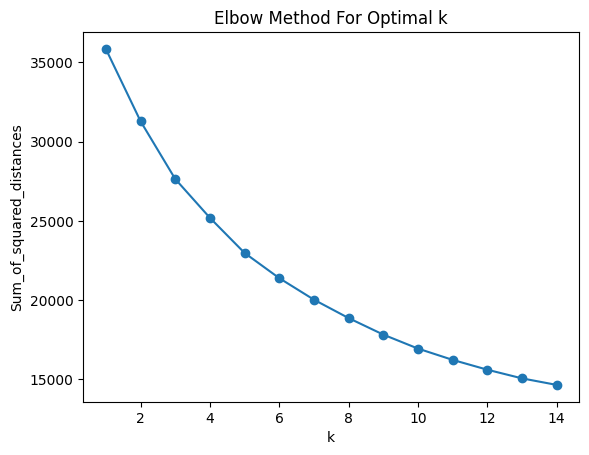

In [42]:
from sklearn.cluster import KMeans
Sum_of_squared_distances = []
K = range(1,15)
for k in K:
  km = KMeans(n_clusters=k, max_iter=300, random_state=None)
  km = km.fit(city_groups_std[features_to_explore])
  Sum_of_squared_distances.append(km.inertia_)
plt.plot(K, Sum_of_squared_distances, marker='o')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()

In [43]:
# Silhouette Coefficient

In [44]:
from sklearn.metrics import silhouette_score
for n_cluster in range(2, 11):
    kmeans = KMeans(n_clusters=n_cluster).fit(city_groups_std[features_to_explore])
    label = kmeans.labels_
    sil_coeff = silhouette_score(city_groups_std[features_to_explore], label, metric='euclidean')
    print("For n_clusters={}, The Silhouette Coefficient is {}".format(n_cluster, sil_coeff))

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For n_clusters=2, The Silhouette Coefficient is 0.250847845534463


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For n_clusters=3, The Silhouette Coefficient is 0.2667154944663321


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For n_clusters=4, The Silhouette Coefficient is 0.2665856025192171


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For n_clusters=5, The Silhouette Coefficient is 0.26922434509482757


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For n_clusters=6, The Silhouette Coefficient is 0.27381458158091126


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For n_clusters=7, The Silhouette Coefficient is 0.1539364951154134


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For n_clusters=8, The Silhouette Coefficient is 0.15990316290874432


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For n_clusters=9, The Silhouette Coefficient is 0.16859244448664887


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For n_clusters=10, The Silhouette Coefficient is 0.17357730278723624


In [45]:
# Let's do with k = 3

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


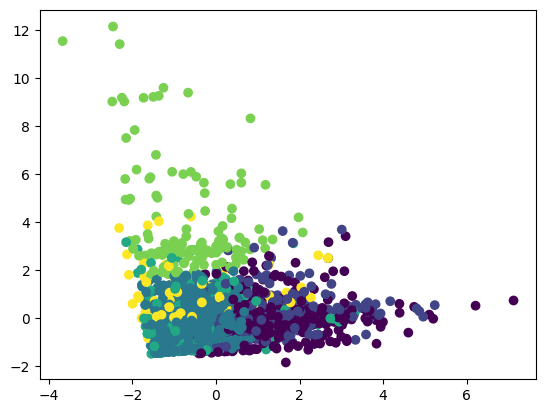

In [46]:
km = cluster.KMeans(n_clusters=6, max_iter=300, random_state=None)
city_groups_std['cluster'] = km.fit_predict(city_groups_std[features_to_explore])
pca = decomposition.PCA(n_components=2, whiten=True)
city_groups_std['x'] = pca.fit_transform(city_groups_std[features_to_explore])[:, 0]
city_groups_std['y'] = pca.fit_transform(city_groups_std[features_to_explore])[:, 1]
plt.scatter(city_groups_std['x'], city_groups_std['y'], c=city_groups_std['cluster'])
plt.show()

In [47]:
# We will merge the two dataframes based on a common column user_location_city
city_groups.merge(city_groups_std[['user_location_city', 'cluster']]).groupby('cluster').mean() # for every column

,user_location_city,duration,days_in_advance,orig_destination_distance,is_mobile,is_package,srch_adults_cnt,srch_children_cnt,srch_rm_cnt
cluster,,,,,,,,,
0,28445.122257,5.297200,81.770733,1915.541740,0.056557,0.793683,2.001364,0.233183,1.071816
1,29905.639706,4.663078,107.811919,5339.432978,0.058572,0.102840,2.036985,0.288747,1.072196
2,28150.319297,2.896612,46.543946,1426.296864,0.085549,0.163466,1.998857,0.300888,1.076721
3,27271.000000,3.160991,52.120181,1417.031369,0.691710,0.271126,2.046900,0.366313,1.069882
4,30622.386364,3.117929,58.344949,1414.128760,0.043561,0.173232,4.252146,0.429798,2.543434
5,29018.181287,3.013871,53.813616,1095.915393,0.046024,0.185783,2.080939,2.149788,1.120502


In [48]:
city_groups_std['cluster'].unique()

array([2, 1, 0, 3, 5, 4], dtype=int32)

<Axes: xlabel='cluster'>

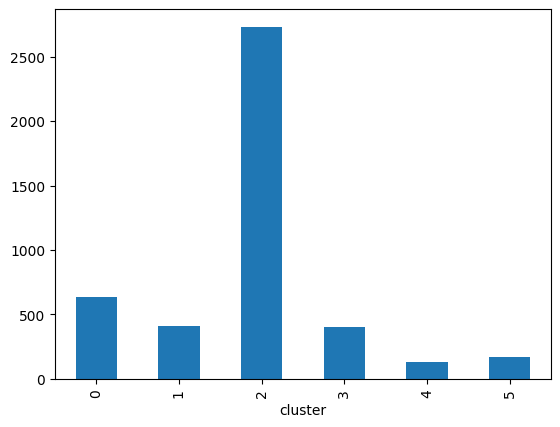

In [49]:
city_groups_std.groupby('cluster')['user_location_city'].agg('count').plot(kind='bar')